In [742]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nbformat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [743]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("final_data.csv")

In [744]:
# Create a new DataFrame with the filter applied
goalkeepers_df = df[(df['position'] == 'Goalkeeper') & (df['position_encoded'] == 1)]

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [745]:
goalkeepers_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
32,/alphonse-areola/profil/spieler/120629,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,...,0.898502,0.449251,3606,34,4,16,8000000,17500000,1,0
33,/lukasz-fabianski/profil/spieler/29692,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,...,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0


In [746]:
goalkeepers_df.shape

(1229, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [747]:
goalkeepers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 0 to 10728
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               1229 non-null   object 
 1   team                 1229 non-null   object 
 2   name                 1229 non-null   object 
 3   position             1229 non-null   object 
 4   height               1229 non-null   float64
 5   age                  1229 non-null   float64
 6   appearance           1229 non-null   int64  
 7   goals                1229 non-null   float64
 8   assists              1229 non-null   float64
 9   yellow cards         1229 non-null   float64
 10  second yellow cards  1229 non-null   float64
 11  red cards            1229 non-null   float64
 12  goals conceded       1229 non-null   float64
 13  clean sheets         1229 non-null   float64
 14  minutes played       1229 non-null   int64  
 15  days_injured         1229 non-null   int64

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [748]:
goalkeepers_df.drop(["player"],axis=1,inplace=True)

In [749]:
goalkeepers_df.drop(["winger"],axis=1,inplace=True)

In [750]:
goalkeepers_df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1
32,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,0.0,0.0,0.898502,0.449251,3606,34,4,16,8000000,17500000,1
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,0.0,0.0,1.331723,0.271780,6623,554,99,4,1000000,9000000,1


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [751]:
goalkeepers_df.duplicated().sum()

np.int64(0)

In [752]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [753]:
#Display number missing values per column
goalkeepers_df.isna().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
dtype: int64

In [754]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [755]:
goalkeepers_df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
dtype: object

In [756]:
goalkeepers_df['age'] = goalkeepers_df['age'].astype('int64')

In [757]:
goalkeepers_df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1


In [758]:
goalkeepers_df.dtypes

team                    object
name                    object
position                object
height                 float64
age                      int64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
dtype: object

In [759]:
# go to clean them 

In [760]:
# check outliers 

### Correcting errors

-------------------

In [761]:
goalkeepers_df.rename(columns={
    'current_value': 'Valuated_price (Euro)',
    'highest_value': 'Highest_valuated_price (Euro)'
}, inplace=True)

In [762]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

In [763]:
categorical_features = ['team', 'position', 'position_encoded', 'appearance']
numeric_features = ['age', 'appearance', 'red cards', 'minutes played', 'days_injured']

In [764]:
filtered_df = goalkeepers_df[(goalkeepers_df['height'] >= 180) & 
                  (goalkeepers_df['height'] <= 200)]

fig = px.histogram(filtered_df, 
                   x='height', 
                   labels={'height': 'height'},
                   nbins=100)

fig.show()

In [765]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['height'] >= 180) & (goalkeepers_df['height'] <= 200)]

In [766]:
goalkeepers_df.shape

(1204, 20)

In [767]:
filtered_df = goalkeepers_df[(goalkeepers_df['age'] >= 18) & 
                  (goalkeepers_df['age'] <= 40)]

fig = px.histogram(filtered_df, 
                   x='age', 
                   labels={'age': 'age'},
                   nbins=100)

fig.show()

In [768]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['age'] >= 18) & (goalkeepers_df['age'] <= 40)]

In [769]:
goalkeepers_df.shape

(1184, 20)

In [770]:
fig = px.box(goalkeepers_df, y = 'Highest_valuated_price (Euro)')
fig.show()

In [771]:
filtered_df = goalkeepers_df[(goalkeepers_df['Highest_valuated_price (Euro)'] > 200000) & 
                  (goalkeepers_df['Highest_valuated_price (Euro)'] <= 10000000)]

fig = px.histogram(filtered_df, 
                   x='Highest_valuated_price (Euro)', 
                   labels={'Highest_valuated_price (Euro)': 'Highest_valuated_price (Euro)'},
                   nbins=100)

fig.show()

In [772]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['Highest_valuated_price (Euro)'] > 200000) & (goalkeepers_df['Highest_valuated_price (Euro)'] <= 10000000)]

In [773]:
goalkeepers_df.shape

(758, 20)

In [774]:
fig = px.box(goalkeepers_df, y = 'Valuated_price (Euro)')
fig.show()

In [775]:
filtered_df = goalkeepers_df[(goalkeepers_df['Valuated_price (Euro)'] > 200000) & 
                  (goalkeepers_df['Valuated_price (Euro)'] <= 10000000)]

fig = px.histogram(filtered_df, 
                   x='Valuated_price (Euro)', 
                   labels={'Valuated_price (Euro)': 'Valuated Price (Euro)'},
                   nbins=100)

fig.show()

In [776]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['Valuated_price (Euro)'] > 200000) & (goalkeepers_df['Valuated_price (Euro)'] <= 10000000)]

In [777]:
goalkeepers_df.shape

(617, 20)

2.Feature engineering

In [778]:
goalkeepers_df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,Valuated_price (Euro),Highest_valuated_price (Euro),position_encoded
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38,75,0.0,0.0,0.040767,0.0,0.0,1.331723,0.271780,6623,554,99,4,1000000,9000000,1


In [779]:
categorical_features

['team', 'position', 'position_encoded', 'appearance']

In [780]:
goalkeepers_df = pd.get_dummies(goalkeepers_df, columns=categorical_features)

In [781]:
goalkeepers_df.drop(["name"],axis=1,inplace=True)

In [782]:
goalkeepers_df.shape

(617, 456)

In [783]:
# Calculate the 35th and 75th percentiles of the price
p35 = goalkeepers_df['Valuated_price (Euro)'].quantile(0.35)
p75 = goalkeepers_df['Valuated_price (Euro)'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
goalkeepers_df['price_category'] = goalkeepers_df['Valuated_price (Euro)'].apply(categorize_price)

goalkeepers_df.drop('Valuated_price (Euro)', axis=1, inplace=True)

# Verify the distribution of the new categories
print(goalkeepers_df['price_category'].value_counts())

price_category
Good_Price     242
Cheap_Price    209
High_Price     166
Name: count, dtype: int64


In [784]:
p35, p75

(np.float64(450000.0), np.float64(1500000.0))

In [785]:
goalkeepers_df['price_category'] 

2         Good_Price
33        Good_Price
54        High_Price
55        High_Price
56        Good_Price
            ...     
10674     Good_Price
10697     Good_Price
10698    Cheap_Price
10727     Good_Price
10728    Cheap_Price
Name: price_category, Length: 617, dtype: object

In [786]:
encoder = LabelEncoder()
goalkeepers_df['price_category_encoded'] = encoder.fit_transform(goalkeepers_df['price_category']) 

3. Feature selection

In [787]:

# Calculate the correlation matrix using only numeric columns
numeric_df = goalkeepers_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_df.corr()

# Sort and print correlation values for 'price_category_encoded'
print(correlation['price_category_encoded'].sort_values(ascending=False))


price_category_encoded           1.000000
Highest_valuated_price (Euro)    0.543640
minutes played                   0.327624
goals conceded                   0.063024
award                            0.058403
height                           0.037557
games_injured                    0.034426
red cards                        0.030505
days_injured                     0.018224
yellow cards                     0.007505
second yellow cards             -0.014778
goals                           -0.026760
clean sheets                    -0.065140
age                             -0.098787
assists                               NaN
Name: price_category_encoded, dtype: float64


In [788]:
threshold = 0.1# You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['price_category_encoded']) > threshold]['price_category_encoded'].index
selected_features

Index(['minutes played', 'Highest_valuated_price (Euro)',
       'price_category_encoded'],
      dtype='object')

In [789]:
selected_features = ['minutes played', 'Highest_valuated_price (Euro)',
       'price_category_encoded']

4. Prepare train and test data

In [790]:
# Prepare data: Features (X) and target (y)
X = goalkeepers_df.drop(['price_category', 'price_category_encoded'], axis=1)  # Drop 'price_category' and 'price_category_encoded'
y = goalkeepers_df['price_category_encoded']  # Target variable (already encoded)

# Check if all columns are numeric in X (features)
print(X.dtypes)  # This will show the data types of each column

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    shuffle=True,
                                                    random_state=42)

# Scale the features (standardize)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data
X_train_scaled = scaler.transform(X_train)  # Transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Check the scaled data (optional)
print("Scaled training data:", X_train_scaled)


height           float64
age                int64
goals            float64
assists          float64
yellow cards     float64
                  ...   
appearance_82       bool
appearance_83       bool
appearance_87       bool
appearance_90       bool
appearance_91       bool
Length: 455, dtype: object
Scaled training data: [[ 0.71389445  0.0108434  -0.10349699 ... -0.05205792  0.
  -0.05205792]
 [ 0.96811114  1.70013062 -0.10349699 ... -0.05205792  0.
  -0.05205792]
 [ 1.98497788 -0.41147841 -0.10349699 ... -0.05205792  0.
  -0.05205792]
 ...
 [ 0.71389445  0.85548701 -0.10349699 ... -0.05205792  0.
  -0.05205792]
 [-0.55718898 -0.41147841 -0.10349699 ... -0.05205792  0.
  -0.05205792]
 [ 0.45967776 -0.83380021 -0.10349699 ... -0.05205792  0.
  -0.05205792]]


In [791]:
X.shape

(617, 455)

Buliding the Model

In [792]:
model = LogisticRegression()

Train the Model

In [793]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

Test the Model

In [794]:
y_pred_test = model.predict(X_test_scaled)

Interpretation of the Model

In [795]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,-0.241088
age,-0.584496
goals,0.026078
assists,0.000000
yellow cards,-0.127799
...,...
appearance_82,0.048277
appearance_83,0.071979
appearance_87,0.061436
appearance_90,0.000000


In [796]:
model.coef_

array([[ 0.46099412,  0.21274473,  0.08983589, ..., -0.00833156,
         0.        , -0.00386564],
       [-0.21990625,  0.37175105, -0.115914  , ..., -0.05310444,
         0.        , -0.04691117],
       [-0.24108788, -0.58449578,  0.02607812, ...,  0.061436  ,
         0.        ,  0.05077681]])

In [797]:
print(model.intercept_)

[-0.10099471  0.69036448 -0.58936977]


Evaluating the Model

In [798]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

1.0

In [799]:
# Test score
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.5020242914979757

In [800]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[46, 30, 10],
       [36, 46, 14],
       [11, 22, 32]])

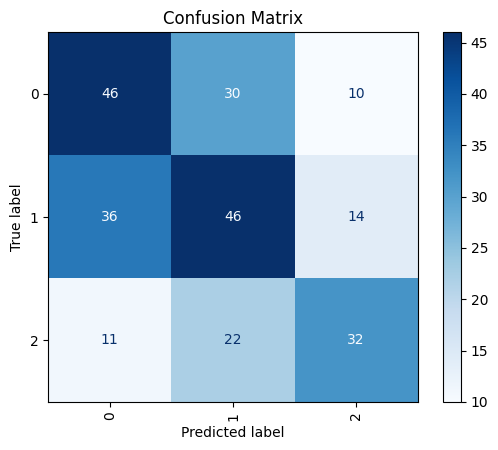

In [801]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [802]:
# Train score
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 1.00
Precision in test: 0.51


In [803]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 1.00
Recall in test: 0.50


In [804]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 1.00
f1-score in test: 0.51


In [805]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       101

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370

Test report: 
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        86
           1       0.47      0.48      0.47        96
           2       0.57      0.49      0.53        65

    accuracy                           0.50       247
   macro avg       0.51      0.50      0.51       247
weighted avg       0.51      0.50      0.50       247

